# Discrete Anomaly Detection Exercise

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import env

## Use basic probability to identify anomalous requests. Using the methods covered in this lesson, examine the rest of the features in the api access logs data set.

In [2]:
#create SQL connection to logs
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/logs'
#SQL query
query = 'SELECT * FROM api_access'
df = pd.read_sql(query, url)

Prepare

In [3]:
# # function to deal with parsing one entry in our log data
#this function works on one string
def parse_log_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[0]
    output['timestamp'] = parts[3][1:].replace(':', ' ', 1)
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] =parts[11].strip('"')
    return pd.Series(output)

In [4]:
#apply string function to every element in a series
df = df.entry.apply(parse_log_entry)

In [5]:
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


In [6]:
#create DataFrame with anomalies in it
new = pd.DataFrame([
    ["95.31.18.119", "21/Apr/2019 10:02:41", "GET", "/api/v1/items/", "HTTP/1.1", 
     '200', 1153005, "python-requests/2.21.0"],
    ["95.31.16.121", "17/Apr/2019 19:36:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", 
     '301', 1005, "python-requests/2.21.0"],
    ["97.105.15.120", "18/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", 
     '301', 2560, "python-requests/2.21.0"],
    ["97.105.19.58", "19/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", 
     '200', 2056327, "python-requests/2.21.0"],
], columns=df.columns)

In [7]:
#join the original dataframe and anomalous dataframes together
df = pd.concat([df,new])

In [8]:
df.head(
    
)

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


In [9]:
df = df.reset_index(drop=True)

In [10]:
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


In [11]:
df['size_mb'] = df['size'] / 1024 / 1024



In [12]:
#get a count of each ip address
df.ip.value_counts()

ip
97.105.19.58      11999
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
68.201.219.223       21
24.26.242.9          21
35.175.171.137        2
52.87.230.102         2
70.121.214.34         2
52.90.165.200         1
95.31.16.121          1
95.31.18.119          1
45.23.250.16          1
52.91.30.150          1
34.207.64.242         1
3.88.129.158          1
54.172.14.223         1
3.92.201.136          1
35.174.209.2          1
54.145.52.184         1
34.229.70.250         1
97.105.15.120         1
Name: count, dtype: int64

In [16]:
#save the ip count into a dataframe
ip_df1 = df.ip.value_counts().reset_index()#.rename(columns={'index':'ip','ip':'count'})

#look at it
ip_df1.head()

,ip,count
0,97.105.19.58,11999
1,173.173.113.51,1059
2,72.181.113.170,613
3,72.181.105.81,246
4,68.201.219.223,21


In [14]:
#percentage count of ip addresses
df.ip.value_counts(normalize=True)

ip
97.105.19.58      0.858420
173.173.113.51    0.075762
72.181.113.170    0.043855
72.181.105.81     0.017599
68.201.219.223    0.001502
24.26.242.9       0.001502
35.175.171.137    0.000143
52.87.230.102     0.000143
70.121.214.34     0.000143
52.90.165.200     0.000072
95.31.16.121      0.000072
95.31.18.119      0.000072
45.23.250.16      0.000072
52.91.30.150      0.000072
34.207.64.242     0.000072
3.88.129.158      0.000072
54.172.14.223     0.000072
3.92.201.136      0.000072
35.174.209.2      0.000072
54.145.52.184     0.000072
34.229.70.250     0.000072
97.105.15.120     0.000072
Name: proportion, dtype: float64

In [22]:
#save the percent to a df
ip_df2 = df.ip.value_counts(normalize=True).reset_index().rename(columns={'proportion' :'percent'})
ip_df2.head()

,ip,percent
0,97.105.19.58,0.858420
1,173.173.113.51,0.075762
2,72.181.113.170,0.043855
3,72.181.105.81,0.017599
4,68.201.219.223,0.001502


In [23]:
ip_df = pd.merge(ip_df1, ip_df2, how='inner', on='ip')
ip_df.head()

,ip,count,percent
0,97.105.19.58,11999,0.858420
1,173.173.113.51,1059,0.075762
2,72.181.113.170,613,0.043855
3,72.181.105.81,246,0.017599
4,68.201.219.223,21,0.001502


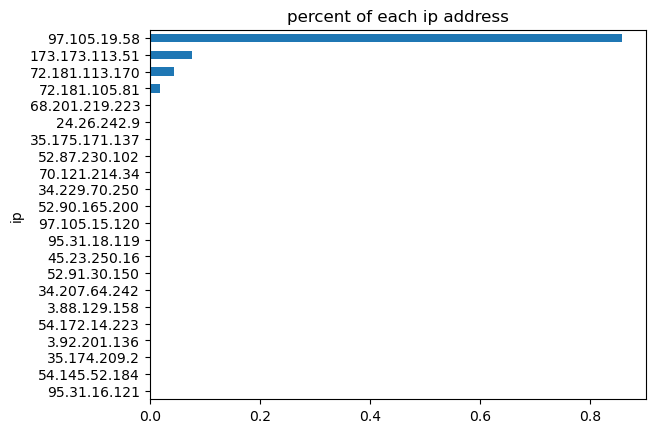

In [24]:
ip_df.set_index('ip').percent.sort_values().plot.barh()

plt.title('percent of each ip address')
plt.show()

In [25]:
df.status_code.value_counts()

status_code
200    13960
499       16
301        2
Name: count, dtype: int64

In [26]:
#look at ip address, their status and the probability it will be that status
status_given_ip = (
    df.groupby('ip')
    .status_code.value_counts(normalize=True)
    .rename('proba_status_given_ip')
    .reset_index()
)
status_given_ip

,ip,status_code,proba_status_given_ip
0,173.173.113.51,200,1.000000
1,24.26.242.9,200,1.000000
2,3.88.129.158,200,1.000000
3,3.92.201.136,200,1.000000
4,34.207.64.242,200,1.000000
5,34.229.70.250,200,1.000000
6,35.174.209.2,200,1.000000
7,35.175.171.137,200,1.000000
8,45.23.250.16,200,1.000000
9,52.87.230.102,200,1.000000


In [27]:
status_given_ip[status_given_ip.status_code != '200']

,ip,status_code,proba_status_given_ip
18,72.181.113.170,499,0.003263
19,95.31.16.121,301,1.000000
21,97.105.15.120,301,1.000000
23,97.105.19.58,499,0.001167


In [28]:
status_given_ip[status_given_ip.proba_status_given_ip < 1.0]

,ip,status_code,proba_status_given_ip
17,72.181.113.170,200,0.996737
18,72.181.113.170,499,0.003263
22,97.105.19.58,200,0.998833
23,97.105.19.58,499,0.001167


<div class="alert alert-block alert-info"> 
<b>Takeaway:</b>
    
It looks like there are two separate ip addresses that do not have the same status code regularly.
- 72.181.113.170 has an error 0.3% of the time
- 97.105.19.58 has an error 0.1% of the time
</div>

In [29]:
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246


In [30]:
df.status_code.value_counts()

status_code
200    13960
499       16
301        2
Name: count, dtype: int64

How many requests were greater than 1gb?


In [34]:
df[df.size_mb > 1.0]

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb
13974,95.31.18.119,21/Apr/2019 10:02:41,GET,/api/v1/items/,HTTP/1.1,200,1153005,python-requests/2.21.0,1.099591
13977,97.105.19.58,19/Apr/2019 19:42:41,GET,/api/v1/sales?page=79/,HTTP/1.1,200,2056327,python-requests/2.21.0,1.961066


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


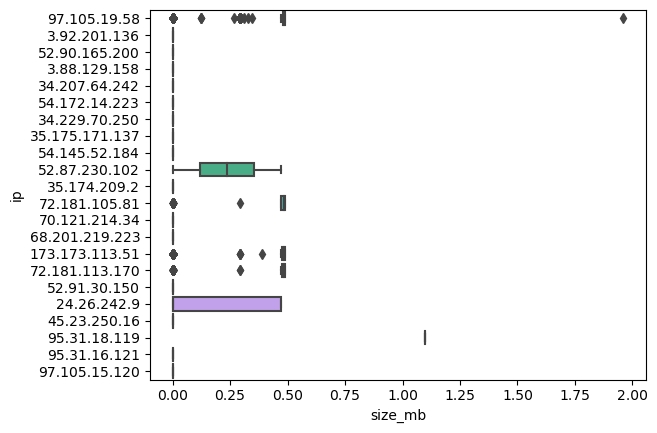

In [66]:
sns.boxplot(data=df, x = df['size_mb'], y=
            df['ip'])
plt.show()

In [59]:
def box_plotter(df, k=1.5):
    """
    Generates a box plot for all columns in a dataframe using matplotlib.
    """
    for col in df.columns:
        if col != "day" and col != "date":
            try:
                plt.figure(figsize=(12, 1))
                plt.boxplot(df[col], vert=False)
                plt.title(col)
                plt.show()
                q1 = df[col].quantile(0.25)
                q3 = df[col].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - k * iqr
                upper_bound = q3 + k * iqr
                print(
                    f"Number of results in lower quartile: {len(df[df[col] < lower_bound])} ({(len(df[df[col] < lower_bound])/len(df))*100:.2f}%)"
                )
                print(
                    f"Number of results in inner quartile: {len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])} ({(len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])/len(df))*100:.2f}%)"
                )
                print(
                    f"Number of results in upper quartile: {len(df[df[col] > upper_bound])} ({(len(df[df[col] > upper_bound])/len(df))*100:.2f}%)"
                )
            except:
                print(
                    f"Error: Could not generate box plot for column {col}. Skipping to next column..."
                )
                plt.close()
                
                continue

Error: Could not generate box plot for column ip. Skipping to next column...
Error: Could not generate box plot for column timestamp. Skipping to next column...
Error: Could not generate box plot for column request_method. Skipping to next column...
Error: Could not generate box plot for column request_path. Skipping to next column...
Error: Could not generate box plot for column http_version. Skipping to next column...
Error: Could not generate box plot for column status_code. Skipping to next column...


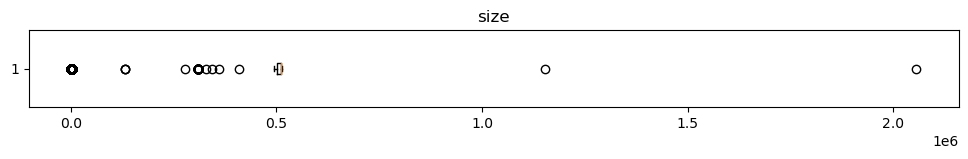

Number of results in lower quartile: 1658 (11.86%)
Number of results in inner quartile: 12318 (88.12%)
Number of results in upper quartile: 2 (0.01%)
Error: Could not generate box plot for column user_agent. Skipping to next column...


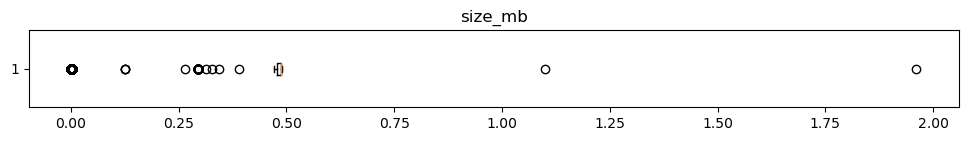

Number of results in lower quartile: 1658 (11.86%)
Number of results in inner quartile: 12318 (88.12%)
Number of results in upper quartile: 2 (0.01%)
Error: Could not generate box plot for column time. Skipping to next column...


In [60]:
box_plotter(df)

Error: Could not generate box plot for column ip. Skipping to next column...
Error: Could not generate box plot for column timestamp. Skipping to next column...
Error: Could not generate box plot for column request_method. Skipping to next column...
Error: Could not generate box plot for column request_path. Skipping to next column...
Error: Could not generate box plot for column http_version. Skipping to next column...
Error: Could not generate box plot for column status_code. Skipping to next column...


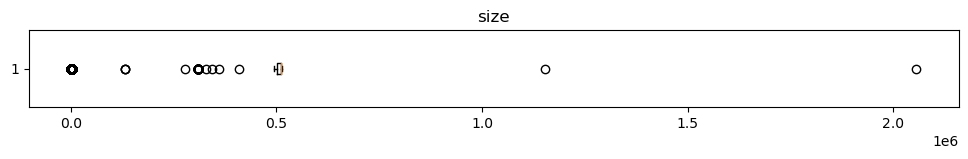

Number of results in lower quartile: 1658 (11.86%)
Number of results in inner quartile: 12318 (88.12%)
Number of results in upper quartile: 2 (0.01%)
Error: Could not generate box plot for column user_agent. Skipping to next column...


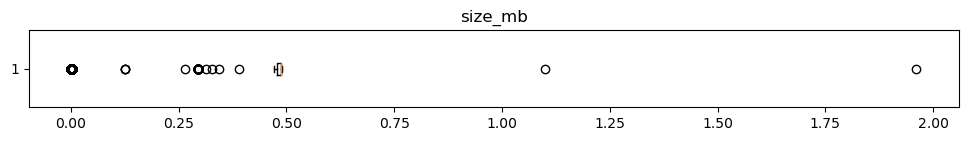

Number of results in lower quartile: 1658 (11.86%)
Number of results in inner quartile: 12318 (88.12%)
Number of results in upper quartile: 2 (0.01%)
Error: Could not generate box plot for column time. Skipping to next column...


In [62]:
box_plotter(df, 3)

In [95]:
df.size_mb.value_counts(normalize=True).sort_values()

size_mb
1.961066    0.000072
0.390481    0.000072
0.002441    0.000072
0.000958    0.000072
1.099591    0.000072
0.265481    0.000072
0.327981    0.000072
0.343606    0.000072
0.312356    0.000072
0.000120    0.000072
0.124856    0.000215
0.000046    0.000215
0.000000    0.001145
0.487652    0.004221
0.488376    0.004221
0.487495    0.004221
0.487196    0.004221
0.489460    0.004221
0.486519    0.004221
0.486675    0.004221
0.488239    0.004221
0.486195    0.004221
0.487864    0.004221
0.486780    0.004221
0.486411    0.004221
0.488194    0.004221
0.488268    0.004221
0.486485    0.004221
0.486676    0.004221
0.488317    0.004221
0.486392    0.004221
0.486492    0.004221
0.486581    0.004221
0.486183    0.004221
0.488131    0.004221
0.488503    0.004221
0.488357    0.004221
0.486845    0.004221
0.487926    0.004221
0.488893    0.004221
0.486695    0.004221
0.486516    0.004221
0.486423    0.004221
0.486888    0.004221
0.487125    0.004221
0.488226    0.004221
0.486200    0.004221
0.486

<Axes: >

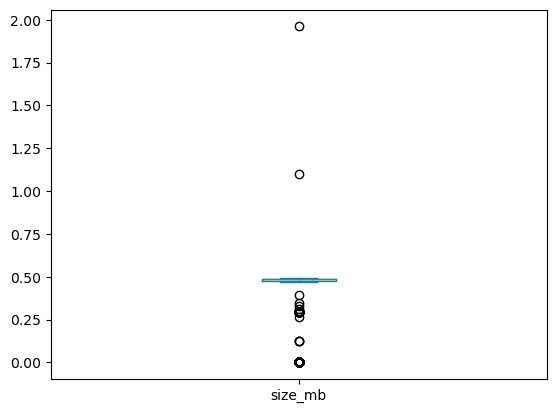

In [82]:
df.size_mb.plot(kind='box')

<Axes: >

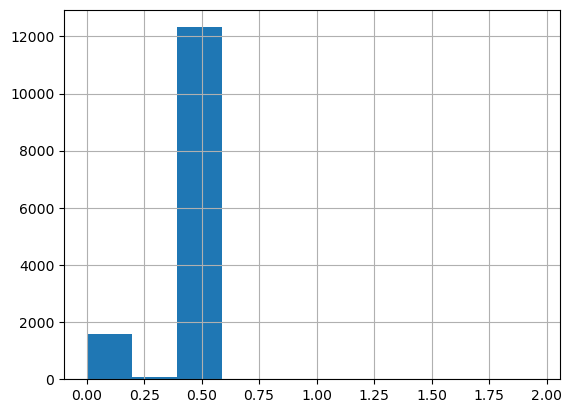

In [69]:
df.size_mb.hist()

In [77]:
# Pandas 
pd.set_option('display.max_row', None)

In [78]:
df.groupby('ip').size_mb.value_counts()

ip              size_mb 
173.173.113.51  0.003396     64
                0.003489     62
                0.001704     62
                0.001266     54
                0.486502     14
                0.486509     12
                0.486506     10
                0.486488      9
                0.487878      9
                0.486511      9
                0.486506      9
                0.486889      8
                0.471025      8
                0.486503      8
                0.488246      8
                0.484176      5
                0.486393      5
                0.483773      5
                0.486310      5
                0.486532      5
                0.486830      5
                0.486501      5
                0.486504      5
                0.486801      5
                0.487567      5
                0.486491      5
                0.486785      5
                0.486702      5
                0.486798      5
                0.487519      5
               

In [92]:
sns.boxplot(data=df, x=df['size_mb'], y=df.groupby('ip').mean())

TypeError: agg function failed [how->mean,dtype->object]

In [38]:
from datetime import datetime

In [37]:
df.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13978 entries, 0 to 13977
Series name: timestamp
Non-Null Count  Dtype 
--------------  ----- 
13978 non-null  object
dtypes: object(1)
memory usage: 109.3+ KB


In [40]:
df.timestamp = df.timestamp.apply(pd.Timestamp)

In [41]:
df.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 13978 entries, 0 to 13977
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
13978 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 109.3 KB


In [42]:
df['date'] = df['timestamp'].dt.date

In [43]:
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb,date
0,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753,2019-04-16
1,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396,2019-04-16
2,97.105.19.58,2019-04-16 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472,2019-04-16
3,97.105.19.58,2019-04-16 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377,2019-04-16
4,97.105.19.58,2019-04-16 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246,2019-04-16


In [44]:
df['time'] = df['timestamp'].dt.time

In [45]:
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb,date,time
0,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753,2019-04-16,19:34:42
1,97.105.19.58,2019-04-16 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396,2019-04-16,19:34:42
2,97.105.19.58,2019-04-16 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472,2019-04-16,19:34:44
3,97.105.19.58,2019-04-16 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377,2019-04-16,19:34:46
4,97.105.19.58,2019-04-16 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246,2019-04-16,19:34:48
